### Exploratory Data Analysis
 
With the data now cleaned I will use some NLP methods to extract the features from the Titles column from both the Space X and NASA subreddits to be used in the modeling process. Prior to proceeding to modeling I will plot some visuals that can provide some insights about the features being chosen for my models. 

In [57]:
import requests
import json
import pandas as pd
import numpy as np
import time
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

#### Step # 1: Import the cleaned data

In [2]:
df_final = pd.read_csv('../data/df_final.csv')
df_final.head()

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,NaN,NaN,False,ElongatedMuskrat,NaN,NaN,contributor,[],NaN,r/SpaceX Bot,...,NaN,NaN,Telstar 18V / APStar 5C Launch Campaign Thread,246,https://www.reddit.com/r/spacex/comments/95cte...,[],NaN,False,all_ads,6
1,NaN,NaN,False,ElongatedMuskrat,NaN,NaN,contributor,[],NaN,r/SpaceX Bot,...,NaN,NaN,"r/SpaceX Discusses [September 2018, #48]",170,https://www.reddit.com/r/spacex/comments/9ckoe...,[],NaN,False,all_ads,6
2,NaN,NaN,False,soldato_fantasma,NaN,NaN,contributor,[],NaN,Host of BulgariaSat-1,...,84.0,140.0,SpaceX granted patents for custom-built Starli...,916,https://www.teslarati.com/spacex-custom-built-...,[],NaN,False,all_ads,6
3,NaN,NaN,False,jclishman,NaN,NaN,contributor,[],NaN,Host of Inmarsat-5 Flight 4,...,140.0,140.0,"Jeff Foust on Twitter - ""Shotwell: think we’ll...",210,https://twitter.com/jeff_foust/status/10378148...,[],NaN,False,all_ads,6
4,NaN,NaN,False,Bossdude234,NaN,NaN,NaN,[],NaN,NaN,...,140.0,140.0,"SpaceX on Twitter - ""Now targeting September 9...",79,https://twitter.com/SpaceX/status/103784391187...,[],NaN,False,all_ads,6


#### Instantiate CountVectorizer

In [3]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=5, max_df=1.0)

In [4]:
cvec_mat = cvec.fit_transform(df_final['title'])

In [5]:
len(cvec.get_feature_names())

1083

In [6]:
cvec_df = pd.DataFrame(cvec_mat.toarray(), columns=cvec.get_feature_names())

In [7]:
cvec_df.head()

,000,10,100,11,12,13,14,15,16,17,...,working,world,worlds,year,year old,years,years ago,yesterday,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cvec_df['subreddit'] = df_final['subreddit'].values

In [9]:
cvec_spacex_mean_df = cvec_df.groupby('subreddit').mean().T.sort_values('spacex', ascending=False).head(10)
cvec_spacex_mean_df

subreddit,nasa,spacex
spacex,0.016300,0.432432
falcon,0.004075,0.266994
launch,0.063570,0.208026
heavy,0.008965,0.096642
falcon heavy,0.002445,0.091728
space,0.171149,0.086814
crew,0.015485,0.085176
dragon,0.007335,0.080262
nasa,0.358598,0.071253
block,0.003260,0.067977


In [10]:
cvec_spacex_mean_df[['spacex']].T.values[0]

array([0.43243243, 0.26699427, 0.20802621, 0.0966421 , 0.09172809,
       0.08681409, 0.08517609, 0.08026208, 0.07125307, 0.06797707])

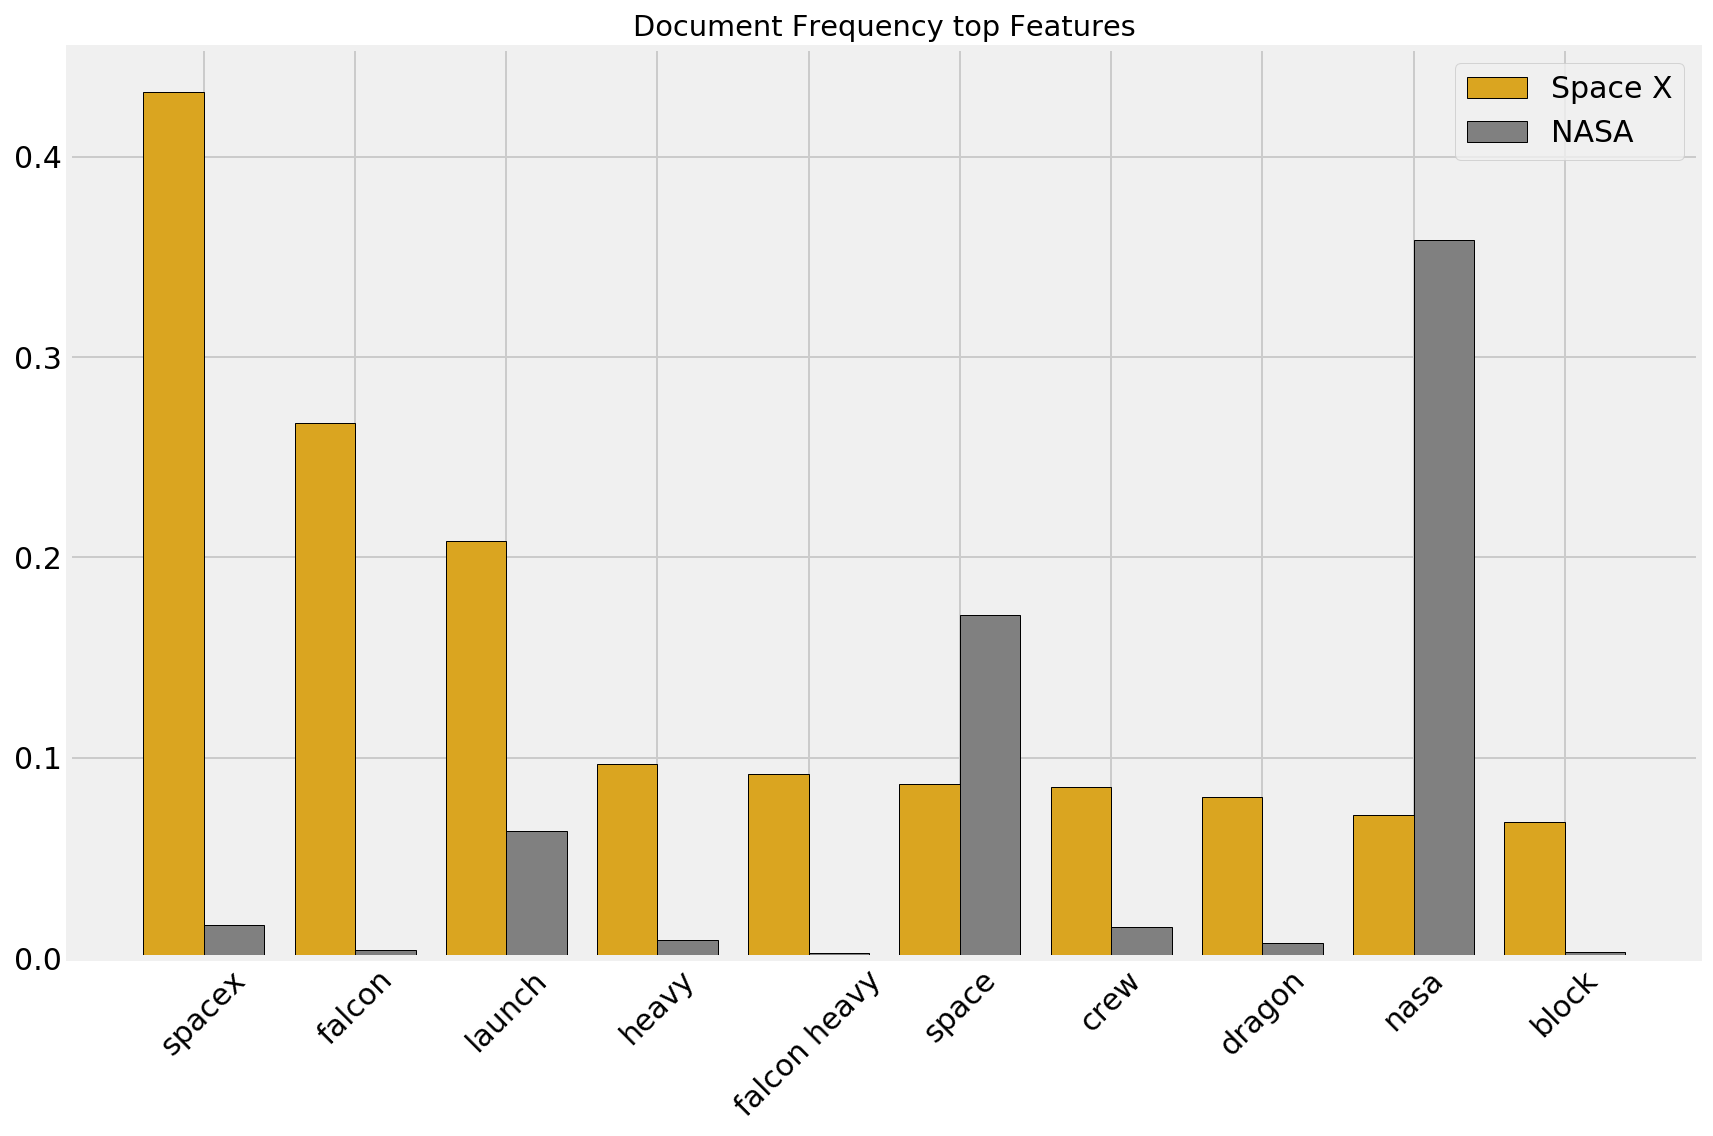

In [43]:
plt.figure(figsize=(12,8))
locs, labels = plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.setp(labels, rotation=45)
plt.title('Document Frequency top Features')
plt.bar(cvec_spacex_mean_df.index, cvec_spacex_mean_df[['spacex']].T.values[0], alpha=1, align='edge', width=-.4, ec='k', color='goldenrod')
plt.bar(cvec_spacex_mean_df.index, cvec_spacex_mean_df[['nasa']].T.values[0], alpha=1, align='edge', width=.4, ec='k', color='grey')
plt.legend(['Space X', 'NASA'], prop={'size': 15})
plt.tight_layout();

In [12]:
cvec_nasa_mean_df = cvec_df.groupby('subreddit').mean().T.sort_values('nasa', ascending=False).head(10)
cvec_nasa_mean_df

subreddit,nasa,spacex
nasa,0.358598,0.071253
space,0.171149,0.086814
mars,0.082315,0.042588
launch,0.063570,0.208026
moon,0.062755,0.011466
apollo,0.044825,0.000819
center,0.040750,0.013104
mission,0.040750,0.040950
saturn,0.035860,0.000000
space station,0.035045,0.009828


In [13]:
cvec_nasa_mean_df[['nasa']].T.values[0]

array([0.35859821, 0.17114914, 0.08231459, 0.06356968, 0.06275469,
       0.04482478, 0.0407498 , 0.0407498 , 0.03585982, 0.03504482])

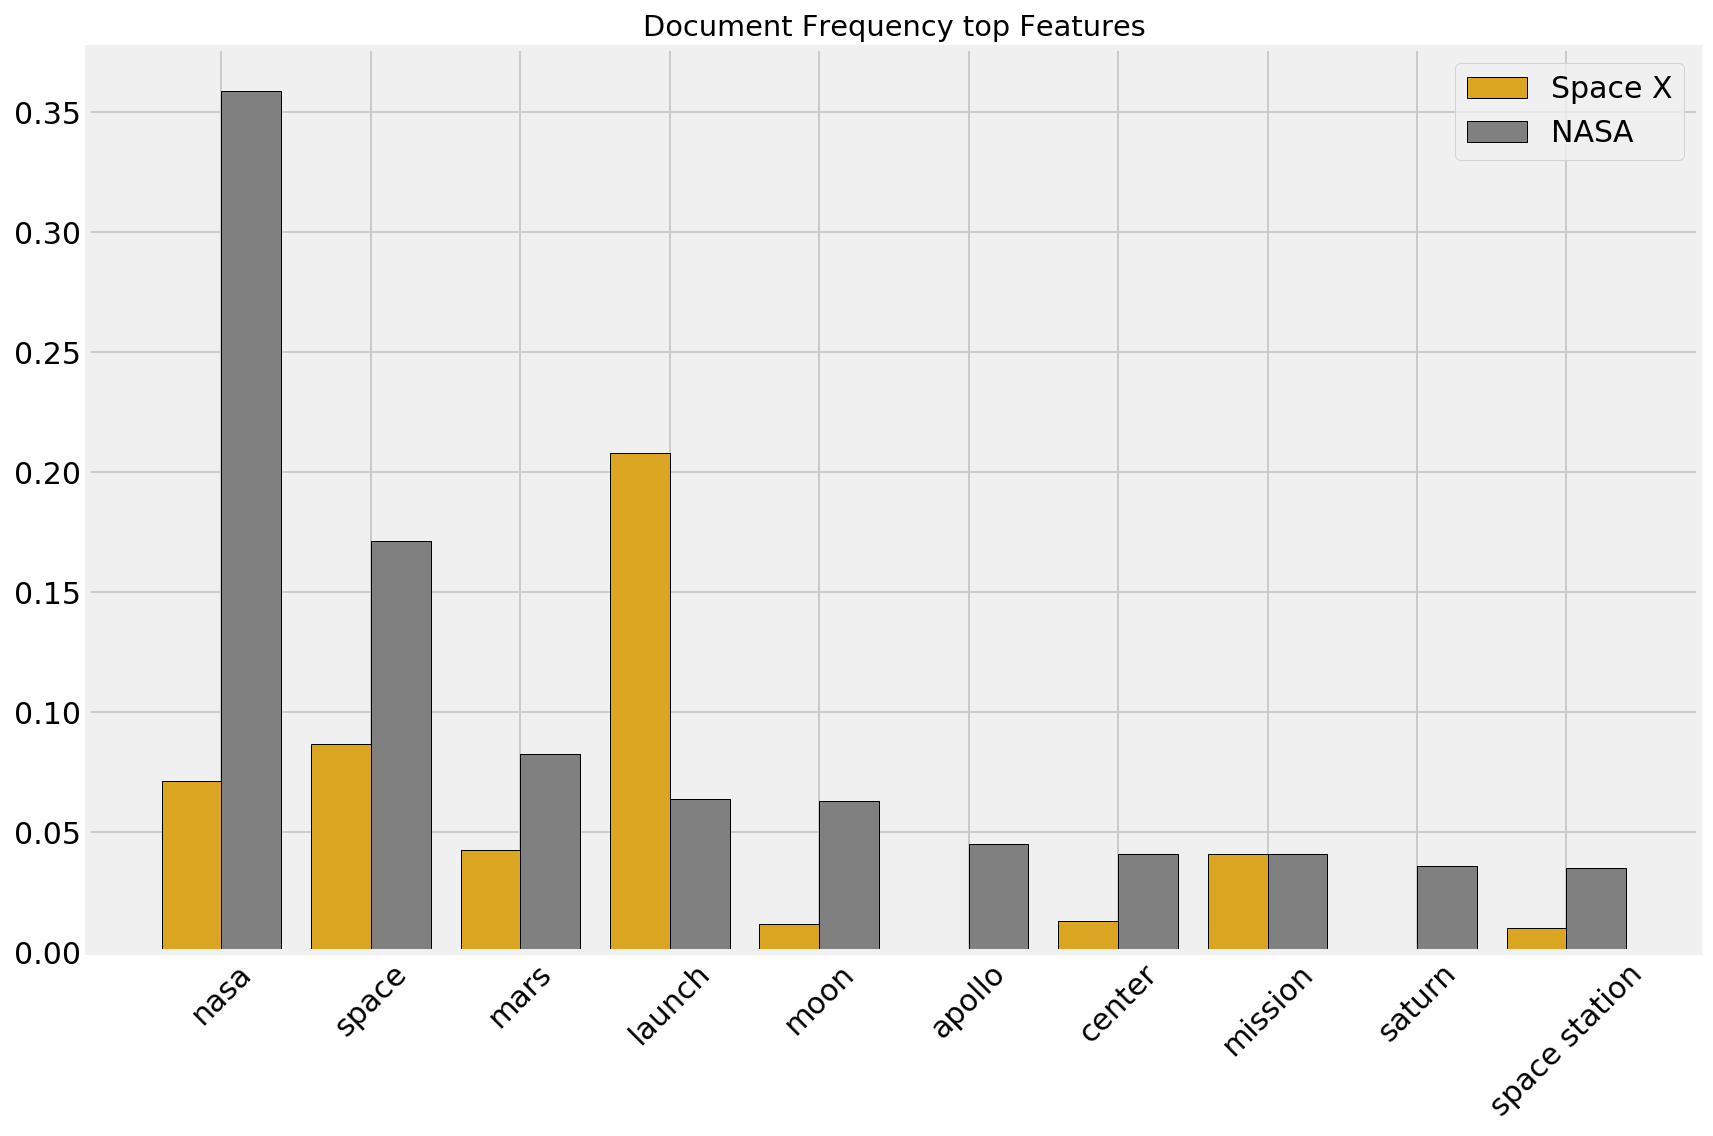

In [44]:
plt.figure(figsize=(12,8))
locs, labels = plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.setp(labels, rotation=45)
plt.title('Document Frequency top Features')
plt.bar(cvec_nasa_mean_df.index, cvec_nasa_mean_df[['spacex']].T.values[0], alpha=1, align='edge', width=-.4, ec='k', color='goldenrod')
plt.bar(cvec_nasa_mean_df.index, cvec_nasa_mean_df[['nasa']].T.values[0], alpha=1, align='edge', width=.4, ec='k', color='grey')
plt.legend(['Space X', 'NASA'], prop={'size': 15})
plt.tight_layout();

#### Instantiate TFIDF

In [15]:
tvec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.01)

In [16]:
tvec_mat = tvec.fit_transform(df_final['title'])

In [17]:
tvec_df = pd.DataFrame(tvec_mat.toarray(), columns=tvec.get_feature_names())

In [18]:
tvec_df.head()

,11,12,15,2018,39a,40,air,air force,amp,apollo,...,thread,time,today,twitter,vab,vehicle,video,view,year,years
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.600783,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.868537,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.387832,0.0,0.0,0.0,0.0,0.476247,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.307456,0.0,0.0,0.0,0.0,...,0.000000,0.304733,0.0,0.267847,0.0,0.0,0.0,0.0,0.000000,0.0


In [19]:
tvec_df['subreddit'] = df_final['subreddit'].values

In [20]:
tvec_spacex_mean_df = tvec_df.groupby('subreddit').mean().T.sort_values('spacex', ascending=False).head(10)
tvec_spacex_mean_df

subreddit,nasa,spacex
spacex,0.006459,0.178241
falcon,0.001078,0.095473
launch,0.025303,0.074250
heavy,0.002855,0.040760
dragon,0.003520,0.040219
falcon heavy,0.000696,0.039795
crew,0.006768,0.038103
space,0.077220,0.037291
block,0.001496,0.033473
rocket,0.013083,0.031649


In [21]:
tvec_spacex_mean_df[['spacex']].T.values[0]

array([0.17824073, 0.09547327, 0.07424986, 0.04076043, 0.04021923,
       0.03979453, 0.03810317, 0.03729056, 0.03347283, 0.03164938])

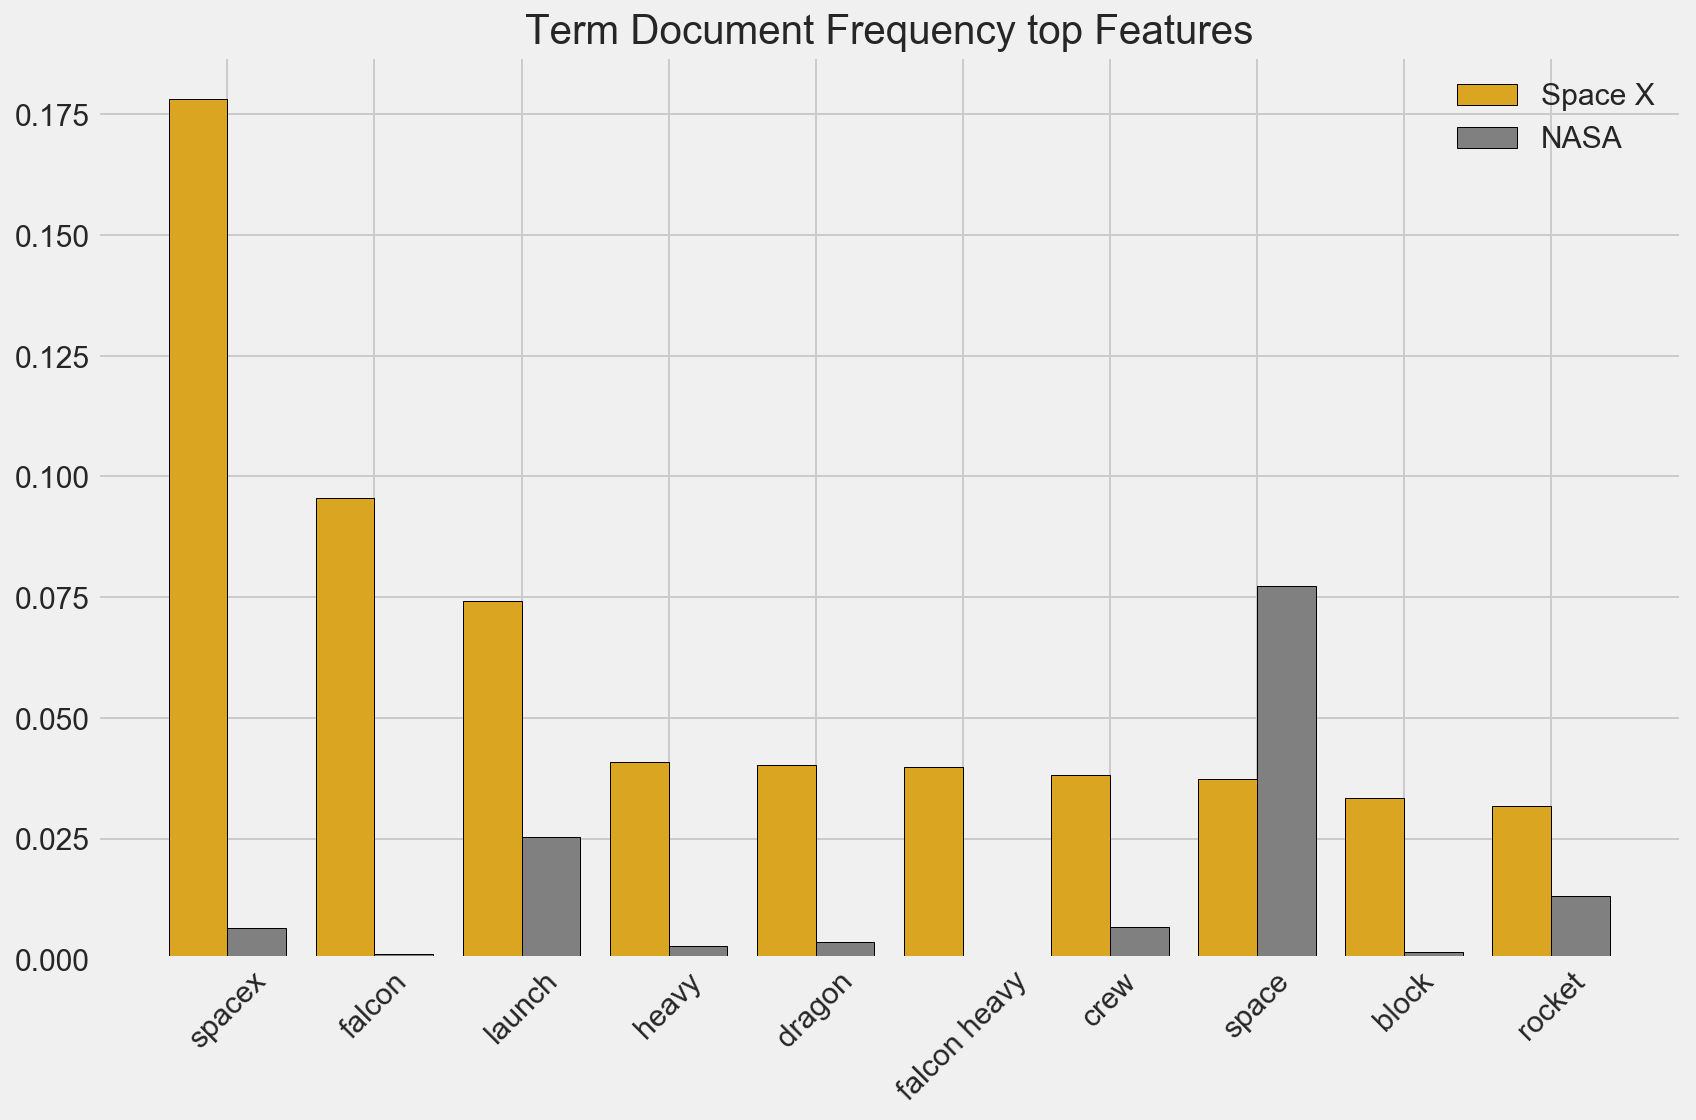

In [56]:
plt.figure(figsize=(12,8))
#sns.set_style(style='darkgrid')
locs, labels = plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.setp(labels, rotation=45)
plt.title('Term Document Frequency top Features')
plt.bar(tvec_spacex_mean_df.index, tvec_spacex_mean_df[['spacex']].T.values[0], alpha=1, align='edge', width=-.4, ec='k', color='goldenrod')
plt.bar(tvec_spacex_mean_df.index, tvec_spacex_mean_df[['nasa']].T.values[0], alpha=1, align='edge', width=.4, ec='k', color='grey')
plt.legend(['Space X', 'NASA'], prop={'size': 15})
plt.tight_layout();

In [23]:
tvec_nasa_mean_df = tvec_df.groupby('subreddit').mean().T.sort_values('nasa', ascending=False).head(10)
tvec_nasa_mean_df

subreddit,nasa,spacex
nasa,0.191723,0.023473
space,0.077220,0.037291
mars,0.056065,0.021998
moon,0.043473,0.006701
apollo,0.026094,0.000299
launch,0.025303,0.074250
astronaut,0.023358,0.004540
new,0.023343,0.020578
saturn,0.021996,0.000000
mission,0.021936,0.017964


In [24]:
tvec_nasa_mean_df[['nasa']].T.values[0]

array([0.19172256, 0.07721962, 0.0560651 , 0.04347324, 0.02609382,
       0.02530323, 0.02335783, 0.02334274, 0.02199628, 0.02193561])

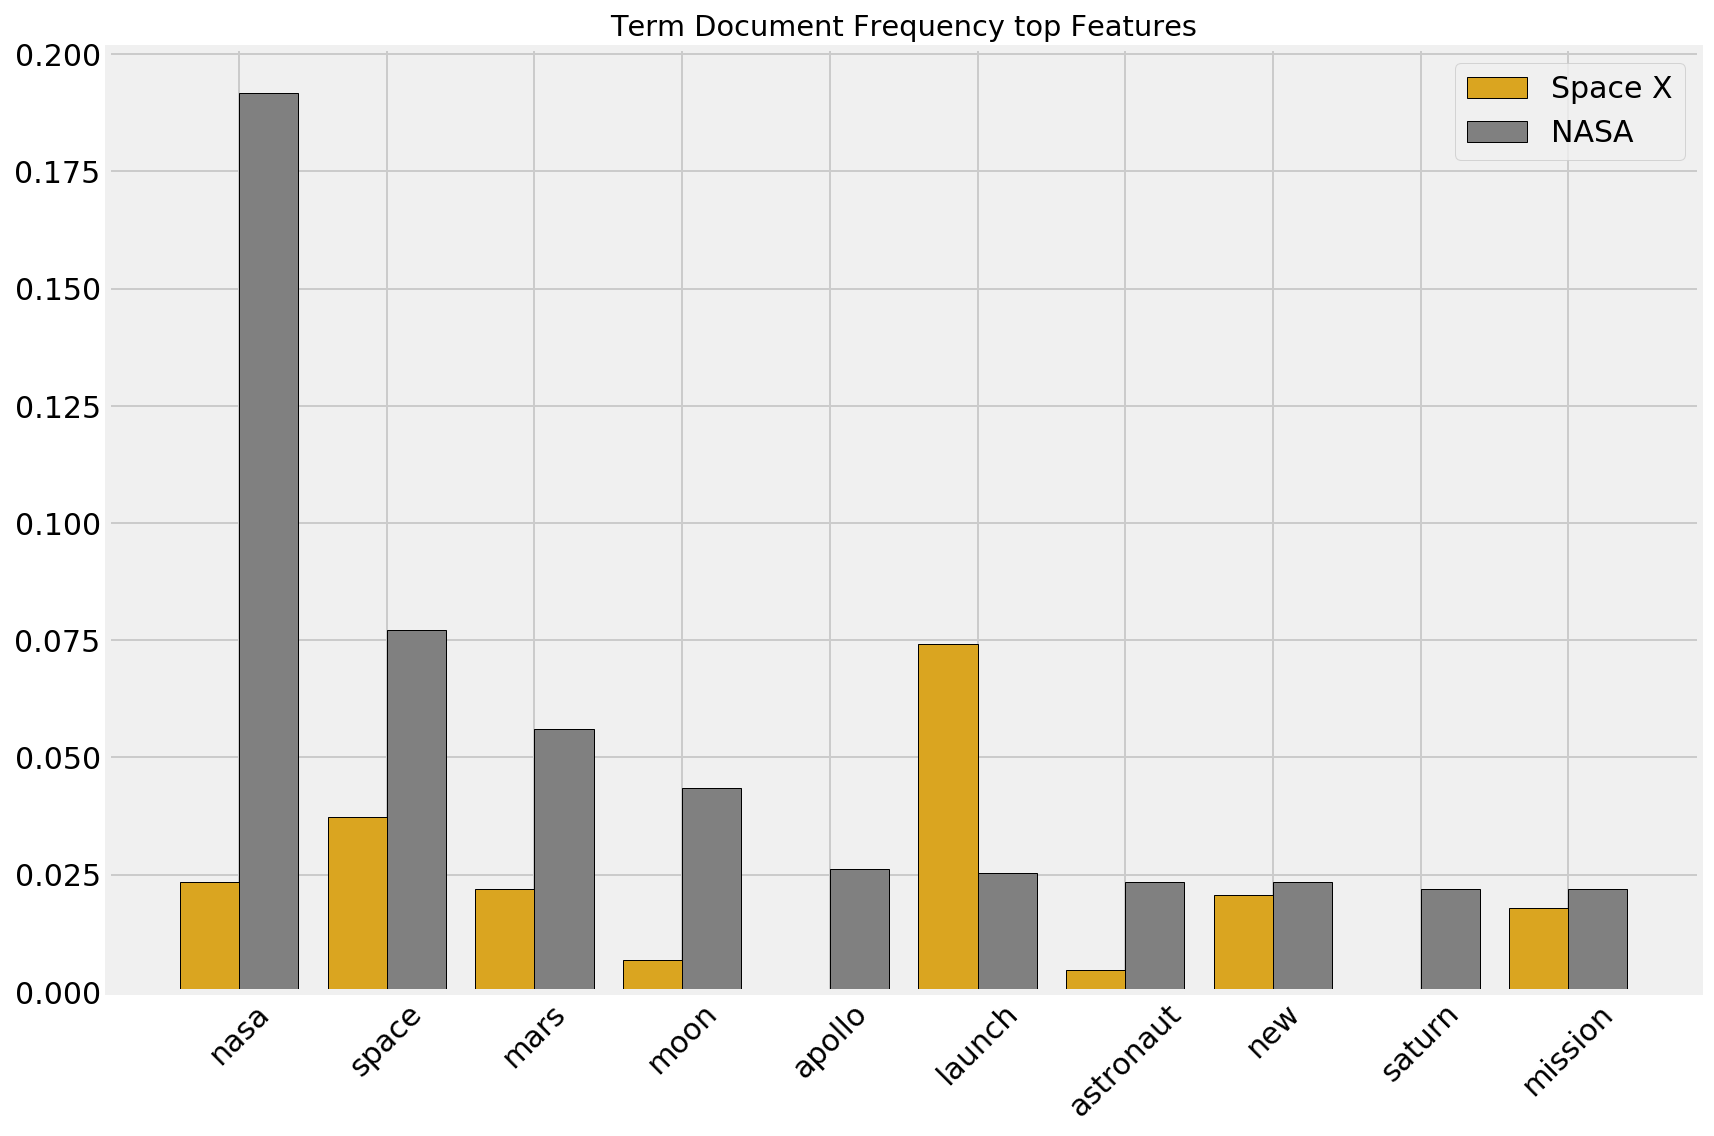

In [47]:
plt.figure(figsize=(12,8))
locs, labels = plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.setp(labels, rotation=45)
plt.title('Term Document Frequency top Features')
plt.bar(tvec_nasa_mean_df.index, tvec_nasa_mean_df[['spacex']].T.values[0], alpha=1, align='edge', width=-.4, ec='k', color='goldenrod')
plt.bar(tvec_nasa_mean_df.index, tvec_nasa_mean_df[['nasa']].T.values[0], alpha=1, align='edge', width=.4, ec='k', color='grey')
plt.legend(['Space X', 'NASA'], prop={'size': 15})
plt.tight_layout();
plt.savefig('../plots/tvec_sorted_nasa')

#### Saved Files

In [26]:
cvec_df.to_csv('../data/cvec_df.csv', index=False)
tvec_df.to_csv('../data/tvec_df.csv', index=False)